# EDA

### Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../data/teleCust1000t.csv")
data

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3


In [3]:
data.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

**features**
- **region**: region del cliente
- **tenure**: antiguedad del cliente (meses)
- **age**: edad
- **marital**: estado civil (0: False, 1: True)
- **address**: dirección
- **income**: ingresos
- **ed**: nivel educativo
- **employ**: tipo de empleo o tiempo
- **retire**: esta jubilado?
- **gender**: género (0, 1)
- **reside**: personas que habitan en la casa.
- **custcat**: categoría del cliente
    - 1: Basic Service.
    - 2: E-Service.
    - 3: Plus Service.
    - 4: Total Service.

#### Limpieza de datos

In [4]:
data.isna().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

In [5]:
data.duplicated().sum()

np.int64(0)

No hay valores nulos ni datos duplicados.

### Análisis descriptivo

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [7]:
def fix_dtype(data: pd.DataFrame):
    bool_cols = ["marital", "retire"]
    data[bool_cols] = (data[bool_cols].astype("int"))
    cat_cols = ["region", "ed","reside", "custcat", "gender"] + bool_cols
    data[cat_cols] = data[cat_cols].astype("category")

fix_dtype(data)
data.dtypes

region     category
tenure        int64
age           int64
marital    category
address       int64
income      float64
ed         category
employ        int64
retire     category
gender     category
reside     category
custcat    category
dtype: object

Se cambio los tipos de datos según lo correcto para cada uno.

In [8]:
data.describe()

,tenure,age,address,income,employ
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.526000,41.684000,11.551000,77.535000,10.987000
std,21.359812,12.558816,10.086681,107.044165,10.082087
min,1.000000,18.000000,0.000000,9.000000,0.000000
25%,17.000000,32.000000,3.000000,29.000000,3.000000
50%,34.000000,40.000000,9.000000,47.000000,8.000000
75%,54.000000,51.000000,18.000000,83.000000,17.000000
max,72.000000,77.000000,55.000000,1668.000000,47.000000


Se observa lo siguiente:
- La media de los meses de antiguedad es de 35.
- La edad de los clientes estan en el rango de 18 a 77.
- Los ingresos estan desde 9.00 hasta 1668.00 como máximo, aunque el 75% de los clientes tiene unos ingresos menores que 83.00

In [9]:
data.describe(include=["category", "bool"])

,region,marital,ed,retire,gender,reside,custcat
count,1000,1000,1000,1000,1000,1000,1000
unique,3,2,5,2,2,8,4
top,3,0,2,0,1,1,3
freq,344,505,287,953,517,375,281


Se observa:
- *region* tiene 3 tipos.
- *address* tiene 50 tipos.
- Hay 5 niveles de educación (*ed*).

#### Análisis univariante

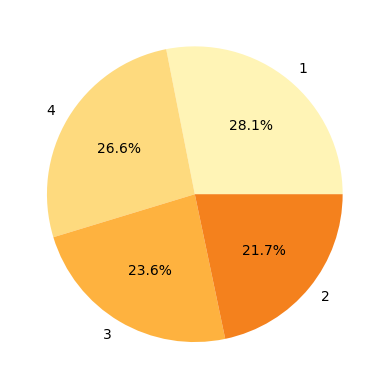

In [10]:
plt.pie(x=data["custcat"].value_counts(), 
        labels=data["custcat"].unique(), 
        colors = sns.color_palette("YlOrBr"), 
        autopct = '%1.1f%%')
plt.show()

Las clases estan balanceadas

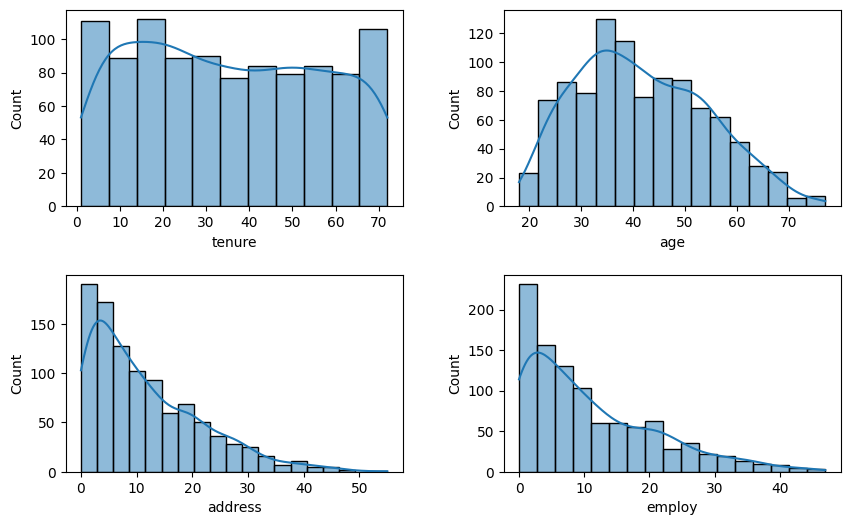

In [11]:
num_cols = data.select_dtypes(["int"])

fig, ax = plt.subplots(2, 2, figsize=(10, 6))
fig.subplots_adjust(hspace=0.35, wspace=0.3)
ax = ax.flatten()
for i, col in enumerate(num_cols):
    sns.histplot(data, x=col, kde=True, ax=ax[i])
    

<Axes: xlabel='income'>

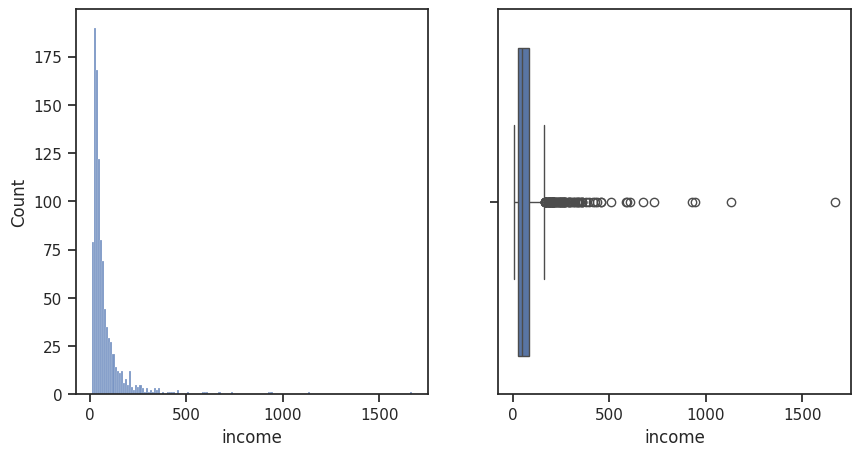

In [12]:

sns.set_theme(style="ticks")
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(data, x="income", ax=ax[0])
sns.boxplot(data, x="income", ax=ax[1])

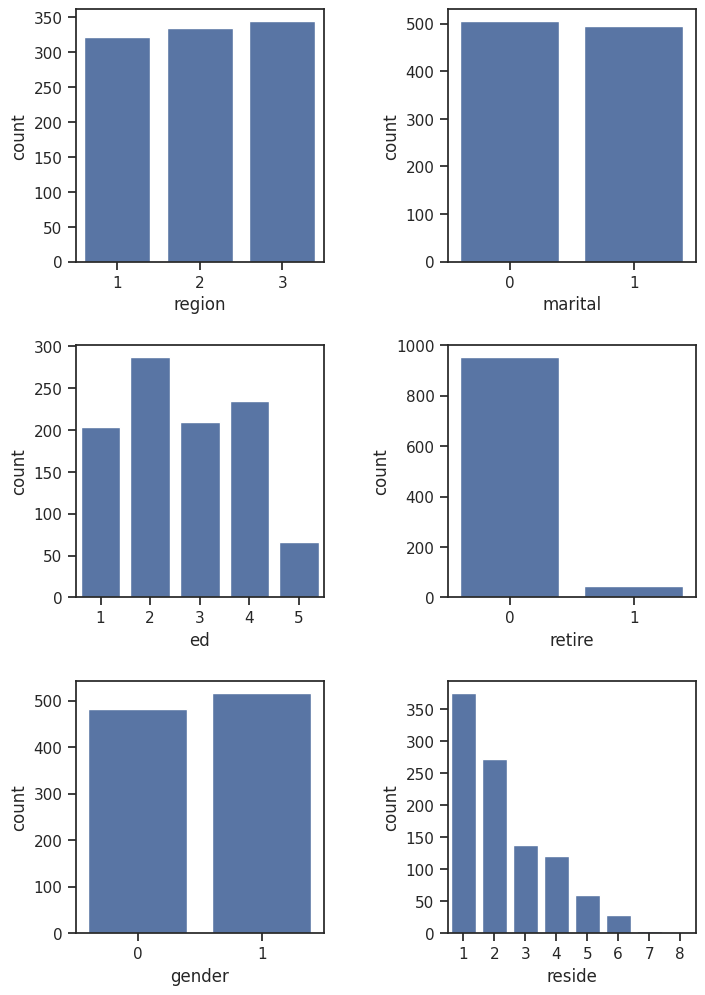

In [13]:
data_pie = data.drop("custcat", axis=1)
cat_cols = data_pie.select_dtypes(include=["category", "bool"])

fig, ax = plt.subplots(3, 2, figsize=(8, 12))
fig.subplots_adjust(wspace=0.5, hspace=0.33)
ax = ax.flatten()
for i, col in enumerate(cat_cols):
    # ax[i].pie(x=data[col].value_counts(), labels=data[col].unique(), autopct="%1.1f%%")
    # ax[i].set_title(col)
    # fig, ax = plt.subplots(1, 2, figsize=(8, 5))
    sns.countplot(data, x=col, ax=ax[i])
    # ax[i].set_title(col)

plt.show()

No hay una 

### Anállisi bivariante

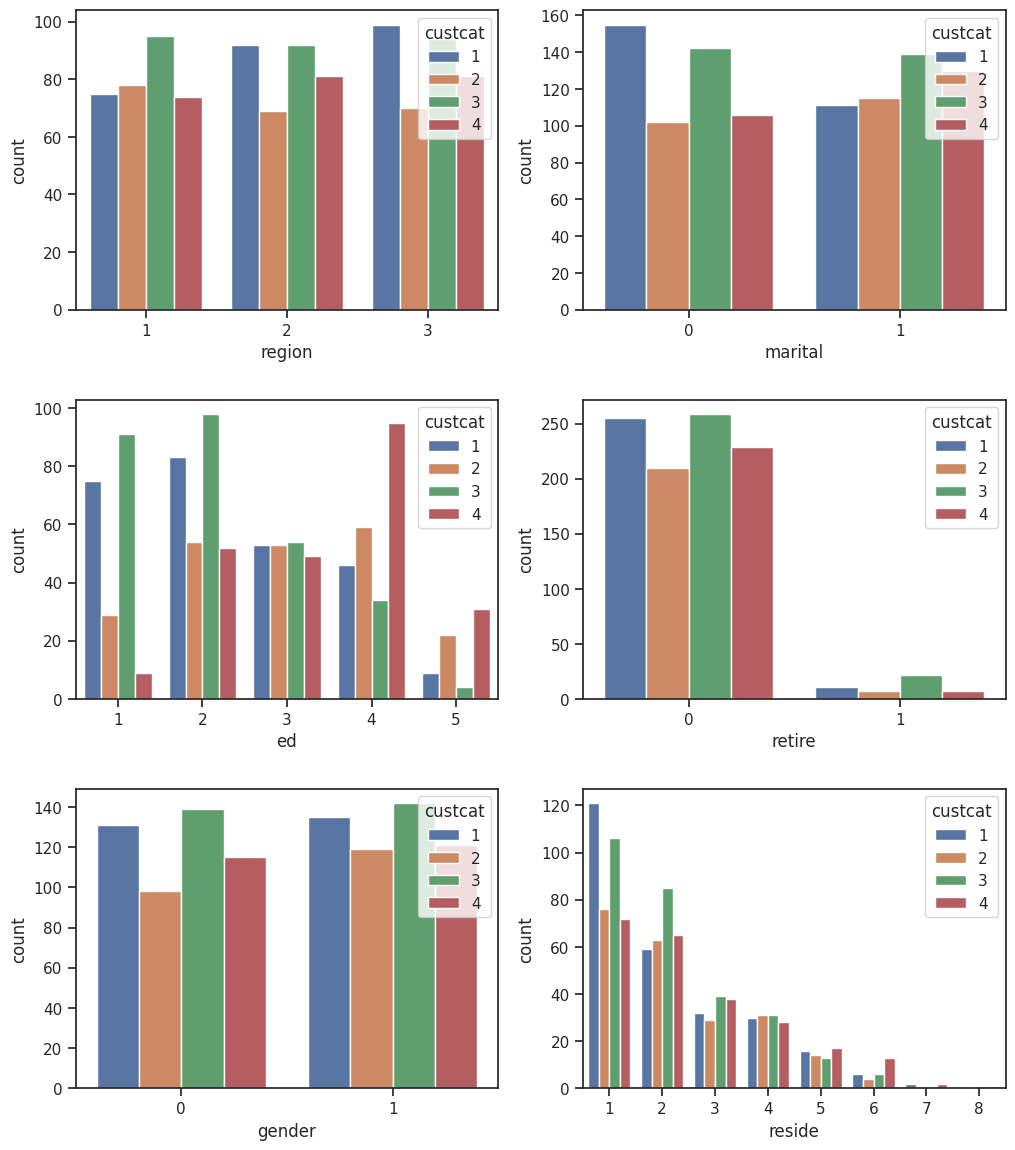

In [14]:
fig, ax = plt.subplots(3, 2, figsize=(12, 14))
fig.subplots_adjust(hspace=0.3)
ax = ax.flatten()
for i, col in enumerate(cat_cols):
    sns.countplot(data, x=col, hue="custcat", ax=ax[i])
    # pd.crosstab(data[col], data['custcat']).plot(kind='bar', stacked=True, ax=ax[i])
    # ax[i].set_title(f"Relación: {col} y categoría")
plt.show()


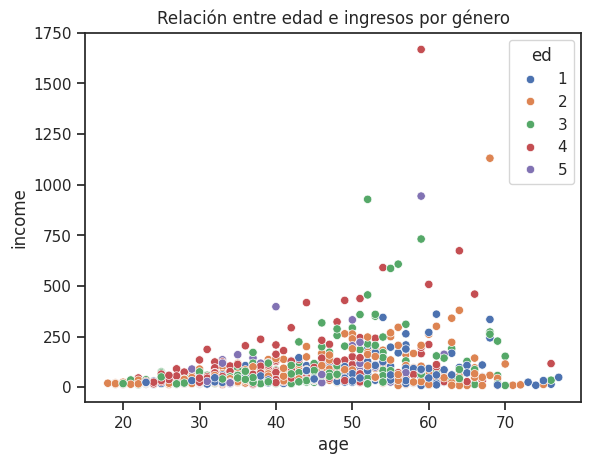

In [15]:
sns.scatterplot(data=data, x='age', y='income', hue='ed')
plt.title("Relación entre edad e ingresos por género")
plt.show()

In [16]:
# Q1 = data['income'].quantile(0.25)
# Q3 = data['income'].quantile(0.75)
# IQR = Q3 - Q1
# upper_out = Q3 + (1.5 * IQR)
# outliers = data[(data["income"] > upper_out)]
# data.loc[data["income"] > upper_out, 'income'] = upper_out
# outliers

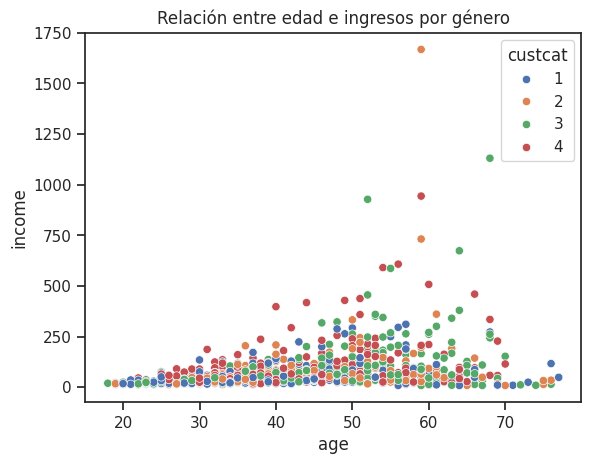

In [17]:
sns.scatterplot(data=data, x='age', y='income', hue='custcat')
plt.title("Relación entre edad e ingresos por género")
plt.show()

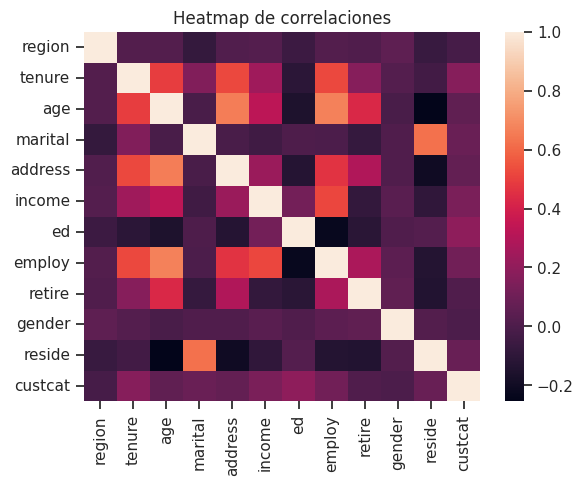

In [18]:
matrix = data.corr()
sns.heatmap(matrix)
plt.title("Heatmap de correlaciones")
plt.show()

In [21]:
data.to_csv("../data/clean_file.csv", index=False)